<a href="https://colab.research.google.com/github/AlexandreBourrieau/ML-F1/blob/master/MNIST/Exercices/Exercice1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chargement du modèle entrainé

In [16]:
from tensorflow.keras.models import model_from_json

with open('model_MNIST1.json', 'r') as json_file:
    loaded_model_json = json_file.read()
restored_model = model_from_json(loaded_model_json)
restored_model.load_weights("weights_MNIST1.h5")

# Importation des modules Python pour traiter les images

In [26]:
from skimage import io, transform

# Lecture des images

Format original de l'image (65, 65, 4)


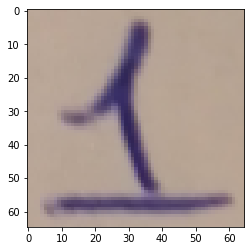

In [43]:
rgb = io.imread('1.png')
print(f'Format original de l\'image {rgb.shape}')
plt.imshow(rgb)

# Conversion de l'image en N&B

![ConversionGrayScale](../Images/GrayScaleConversion.png "ConversionNB")

Format de l'image en N&B (65, 65)


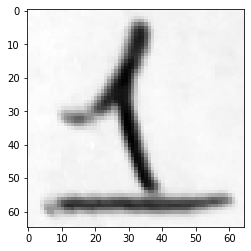

In [44]:
gray = np.dot(rgb[...,:], [0.299, 0.587, 0.114, 0])
print(f'Format de l\'image en N&B {gray.shape}')
plt.imshow(gray, cmap='gray')

# Redimensionner l'image en 28x28px

Format de l'image redimensionnée (28, 28)


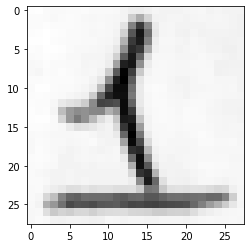

In [45]:
gray28x28 = transform.resize(gray, (28, 28))
print(f'Format de l\'image redimensionnée {gray28x28.shape}')
plt.imshow(gray28x28, cmap='gray')

# Filtrer le fond d'image

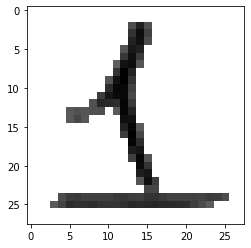

In [46]:
vectorized_filter = np.vectorize(lambda v: 255 if v > 128 else v)
filtered = vectorized_filter(gray28x28)
plt.imshow(filtered, cmap='gray')

# Inverser l'image et normliser la valeur des pixels

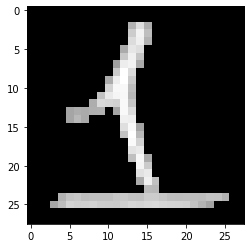

In [47]:
inverted = 255 - filtered
reshaped = inverted.reshape(28, 28, 1) / 255.0
batch = np.array([reshaped])
plt.imshow(inverted, cmap='gray')

# Prédiction avec un modèle pré-entrainé

In [48]:
predictions = restored_model.predict(batch)
plus_probable = predictions.argmax(1)
plus_probable

array([1])

# Afficher les probabilités

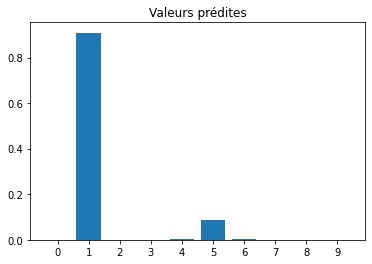

In [49]:
plt.bar(range(10), predictions[0], tick_label=range(10))
plt.title('Valeurs prédites')
plt.show()

# Combiner le code précédent dans une fonction

In [50]:
def prediction_chiffre(nom_fichier):
  # Lecture de l'image
  rgb = io.imread(nom_fichier)

  # Conversion en N&B
  gray = np.dot(rgb[...,:], [0.299, 0.587, 0.114, 0])

  # Redimensionnement en 28x28 px
  gray28x28 = transform.resize(gray, (28, 28))

  # Filtrage du fond
  vectorized_filter = np.vectorize(lambda v: 255 if v > 128 else v)
  filtered = vectorized_filter(gray28x28)

  # Inversion des "couleurs" et normalisation des valeurs
  inverted = 255 - filtered
  reshaped = inverted.reshape(28, 28, 1) / 255.0
  batch = np.array([reshaped])

  # Prédiction
  redictions = restored_model.predict(batch)
  plus_probable = predictions.argmax(1)
  return plus_probable

In [ ]:
prediction_chiffre("2.png")